In [ ]:
# -----------------------------
# 1. IMPORT LIBRARIES
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 2. LOAD THE DATASET
# -----------------------------
df = pd.read_csv("PalmerPenguinsDataset.csv")

# Display first few rows
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
# -----------------------------
# 3. DATA CLEANING
# -----------------------------

# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df = df.dropna()

# Confirm dataset is clean
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [ ]:
# -----------------------------
# 4. EXPLORATORY DATA ANALYSIS
# -----------------------------

# Summary statistics
df.describe()
# Unique values for categorical columns
df[['species', 'island', 'sex']].nunique()


species    3
island     3
sex        2
dtype: int64

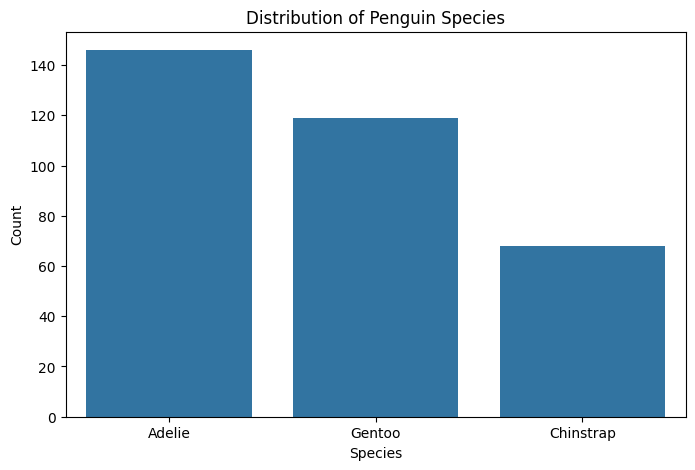

In [8]:
#VISUALIZATION TASKS
#1. Species Distribution – Bar Chart
plt.figure(figsize=(8,5))
sns.countplot(x='species', data=df)
plt.title("Distribution of Penguin Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


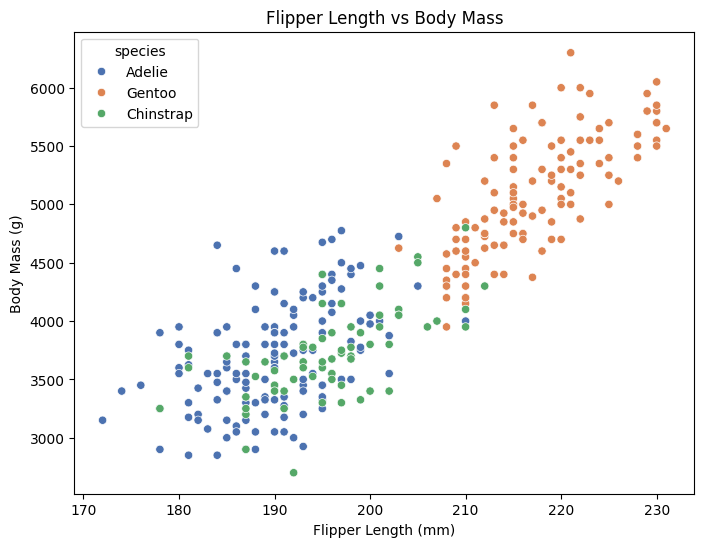

In [9]:
#2. Flipper Length vs Body Mass – Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species',
    palette='deep'
)
plt.title("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()


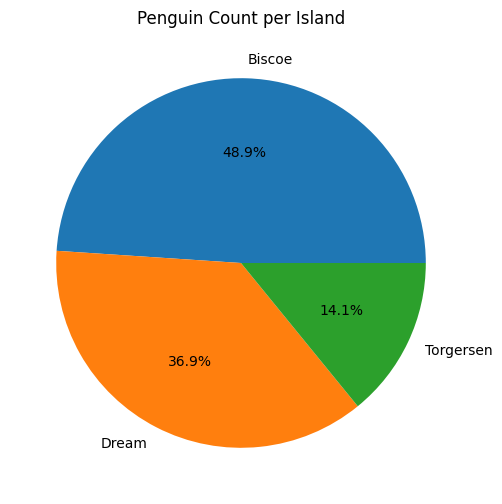

In [10]:
#3. Island Distribution – Pie Chart
plt.figure(figsize=(6,6))
df['island'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Penguin Count per Island")
plt.ylabel("")
plt.show()


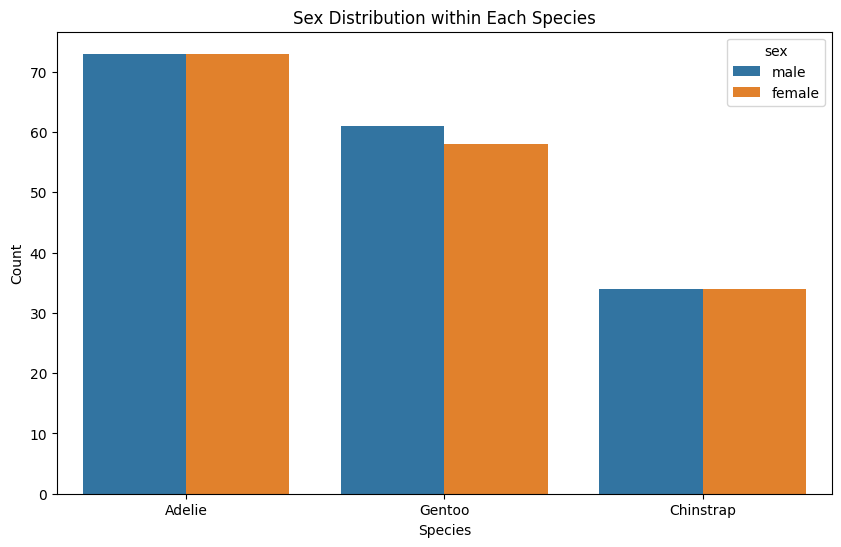

In [11]:
#4. Sex Distribution within Each Species – Grouped Bar Chart
plt.figure(figsize=(10,6))
sns.countplot(x='species', hue='sex', data=df)
plt.title("Sex Distribution within Each Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


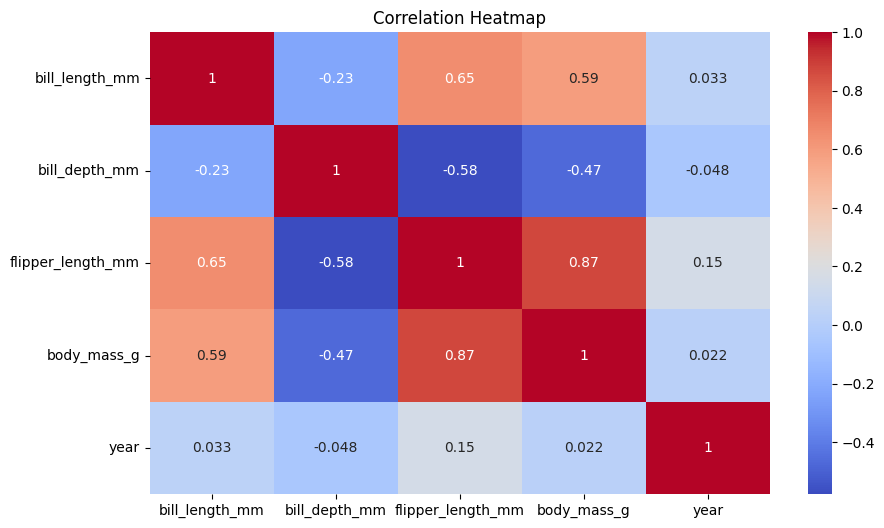

In [12]:
#5. Heatmap of Correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


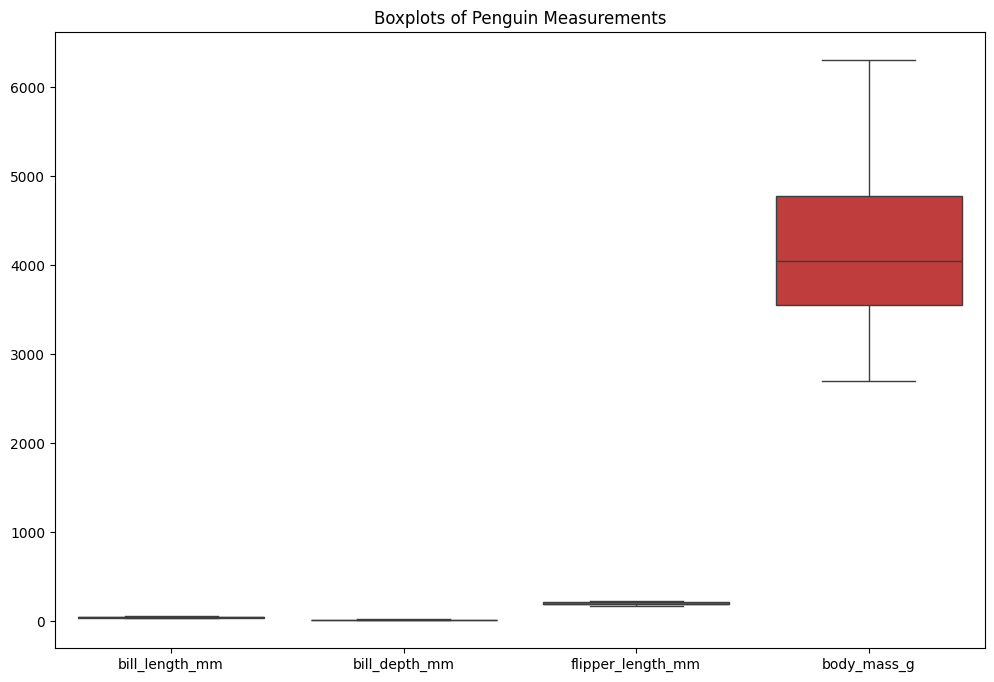

In [13]:
#6. Boxplots for Key Measurements
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.title("Boxplots of Penguin Measurements")
plt.show()


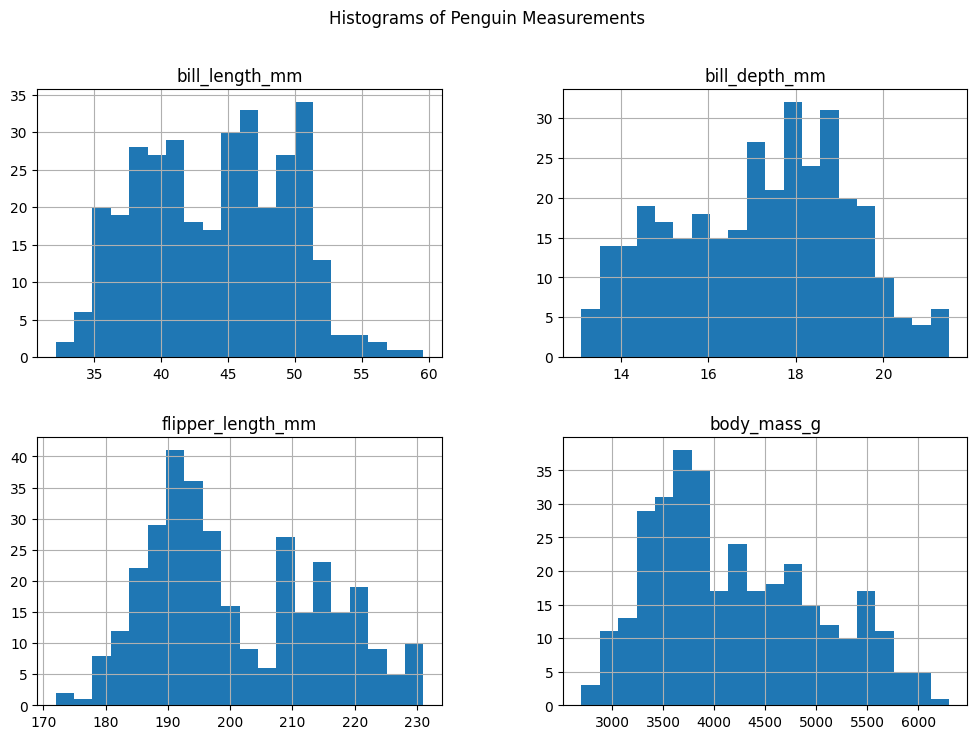

In [14]:
#7. Histograms of Key Measurements
df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].hist(
    figsize=(12,8), bins=20
)
plt.suptitle("Histograms of Penguin Measurements")
plt.show()


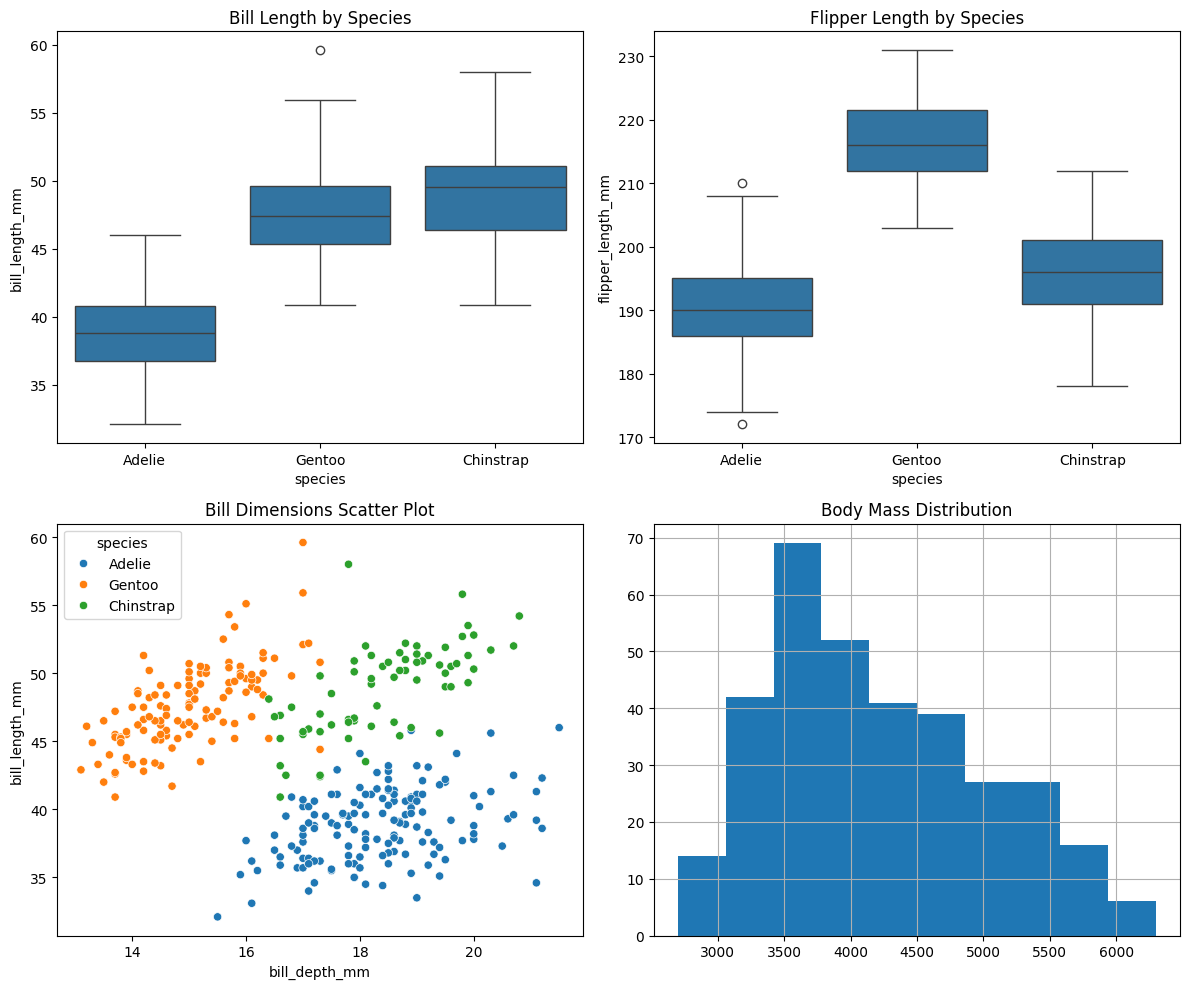

In [15]:
#8. Subplots Comparison
fig, axes = plt.subplots(2,2, figsize=(12,10))

sns.boxplot(x='species', y='bill_length_mm', data=df, ax=axes[0,0])
axes[0,0].set_title("Bill Length by Species")

sns.boxplot(x='species', y='flipper_length_mm', data=df, ax=axes[0,1])
axes[0,1].set_title("Flipper Length by Species")

sns.scatterplot(
    data=df, x='bill_depth_mm', y='bill_length_mm',
    hue='species', ax=axes[1,0]
)
axes[1,0].set_title("Bill Dimensions Scatter Plot")

df['body_mass_g'].hist(ax=axes[1,1])
axes[1,1].set_title("Body Mass Distribution")

plt.tight_layout()
plt.show()


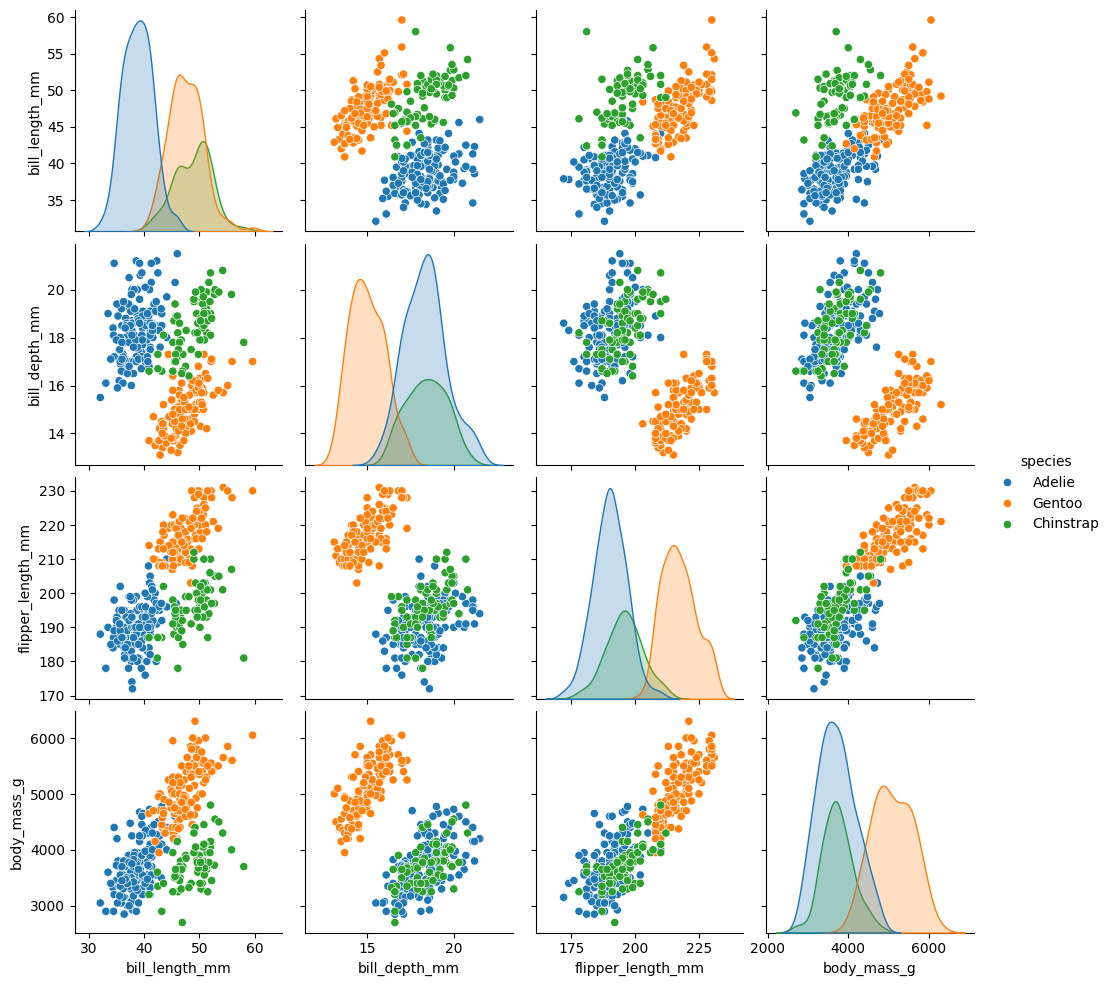

In [16]:
#9. Seaborn Pairplot
sns.pairplot(
    df,
    vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    hue='species',
    diag_kind='kde'
)
plt.show()


In [ ]:

# Conclusion

"""From the visualizations, we can conclude:

- The dataset contains three penguin species: Adelie, Chinstrap, and Gentoo, with Gentoo being the most common.
- Flipper length and body mass show a positive correlation, especially for Gentoo penguins.
- Penguins are distributed across three islands: Biscoe, Dream, and Torgersen, with Biscoe being the most populated.
- Sex distribution is relatively balanced across species.
- The heatmap shows strong correlations between body mass and flipper length.
- Boxplots reveal notable differences in measurement distributions across species.
- Pairplots highlight species separation based on physical characteristics.

Overall, the Palmer Penguins dataset provides a rich opportunity for exploring relationships between biological traits."""

